# Exercises

This notebook contains exercises for section 3.2 of the Medford group graduate student training. These exercises cover basic ML strategies, including classification and generative models. <br><br>
**NOTE:** These exercises cover only a small sample of ML techniques. All ML will be implemented in the *scikit-learn* Python package here. Documentation can be found at https://scikit-learn.org/stable/.

## Exercise 1

This exercise will use Supper Vector Machines to build a classification model for a 2-class dataset with a dimensionality of 2. Begin by creating a moons toy dataset with 200 samples and a noise of 0.1 using the sklearn.datasets.make_moons function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html<br><br>
Visualize the dataset and color each point according to its assigned class.

In [7]:
# code here
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline

X_data, y_data = make_moons(n_samples=200, shuffle=True, noise=0.1, random_state=47)
fig,ax = plt.subplots(1,1,figsize=(2,2), dpi=250)
cmap = ['blue','orange']
ax.scatter(X_data[:,0],X_data[:,1],color=[cmap[i] for i in y_data])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Data')

Text(0.5, 1.0, 'Data')

Train a support vector machine with a radial basis function (RBF) kernel to create a discriminative classification model for this dataset. Tune the *gamma* and *C* parameters to achieve a minimum accuracy of 90% on your test set. Use an 80/20 train/test split.<br><br> Comment on what happens as *C* goes to 0 and as *C* goes to infinity.
Plot the data colored by the true class and show the SVM decision boundary. Calculate the accuracy, precision, and recall for your prediction.

In [17]:
# code here
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

def create_and_train_model(X_data:tuple, y_data:tuple, random_state:int=42, C:float=1.0, kernel:str='rbf', gamma:float=1.0):
    # Create the model
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    # Fit the model
    model.fit(X_data[0], y_data[0])
    _accuracy, _precision, _recall = get_scores(model, X_data[1], y_data[1])
    return model, _accuracy, _precision, _recall

def get_scores(model, X_test, y_test):
    # Predict the labels
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    _accuracy = accuracy_score(y_test, y_pred)
    # Calculate the precision
    _precision = precision_score(y_test, y_pred)
    # Calculate the recall
    _recall = recall_score(y_test, y_pred)
    return _accuracy, _precision, _recall

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.2)
# Create loop to run until desired accuracy is reached
threshold = 0.9
accuracy = 0.0
_C = 1.0
_gamma = 1.0
_mult = (0.5,1.5)
C = _C * _mult[1]
gamma = _gamma * _mult[1]
while accuracy < threshold:
    # Call the function to create and train the model
    model, tmp_accuracy, precision, recall = create_and_train_model((X_train, X_test), (y_train, y_test), random_state=42, C=C, kernel='rbf', gamma=gamma)
    # Print accuracy per iteration
    print(f'Accuracy: {tmp_accuracy}')
    # Update C and gamma
    if tmp_accuracy > accuracy:
        accuracy = tmp_accuracy
        if C > _C:
            _C = C
            _gamma = gamma
            C *= _mult[1]
            gamma *= _mult[1]
        else:
            _C = C
            _gamma = gamma
            C *= _mult[0]
            gamma *= _mult[0]
    else:
        C = _C * _mult[0]
        gamma = _gamma * _mult[0]
        
# Print final scores and store best model
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
best_model = model

# Test for accuracy as C goes to 0 and inf
C_vals = (0.0001, 1000000)
for C in C_vals:
    model, tmp_accuracy, precision, recall = create_and_train_model((X_train, X_test), (y_train, y_test), random_state=42, C=C, kernel='rbf', gamma=1.0)
    print(f'C_val = {C}, Accuracy: {tmp_accuracy}')
    print(f'C_val = {C}, Precision: {precision}')
    print(f'C_val = {C}, Recall: {recall}')
    
# create a mesh to plot in
h = 0.2
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig,ax = plt.subplots(figsize=(4,4), dpi = 100)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())



Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
C_val = 0.0001, Accuracy: 0.475
C_val = 0.0001, Precision: 0.475
C_val = 0.0001, Recall: 1.0
C_val = 1000000, Accuracy: 1.0
C_val = 1000000, Precision: 1.0
C_val = 1000000, Recall: 1.0


(-1.6224333979829766, 1.9775666020170226)

Response
- Accuracy diminishes as C goes to 0, improves (remains the same) as C goes to infinity.

Show the confusion matrix for your best-performing model.

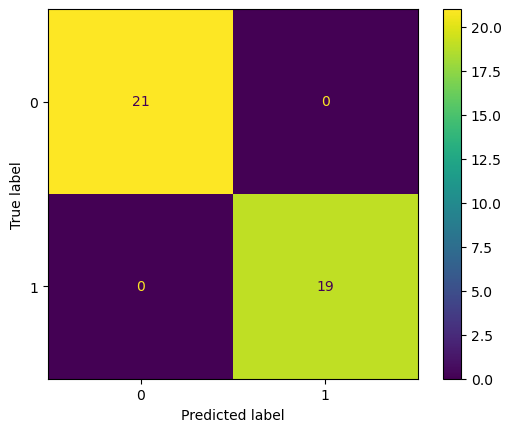

In [13]:
# code here
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Calculate the confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_model.classes_)
disp.plot()
plt.show()


## Exercise 2

This exercise is a continuation of the previous and uses the same dataset. <br><br>
Create an random 80/20 train/test split for the moons dataset from above. For k in [2,5,10,20], use a k-nearest neighbors (kNN) model for classification. Use subplots to show the result with each point colored according to its predicted class for each value of k. Compute the accuracy for each case. <br><br>Laslty, discuss what is happening when the `fit` method is called. Does kNN have a loss function? How are classes assigned? Is this supervised or un-supervised ML?

KNN with k = 2
Accuracy on training set: 1.0
Accuracy on test set: 1.0
KNN with k = 5
Accuracy on training set: 1.0
Accuracy on test set: 1.0
KNN with k = 10
Accuracy on training set: 1.0
Accuracy on test set: 1.0
KNN with k = 20
Accuracy on training set: 1.0
Accuracy on test set: 1.0


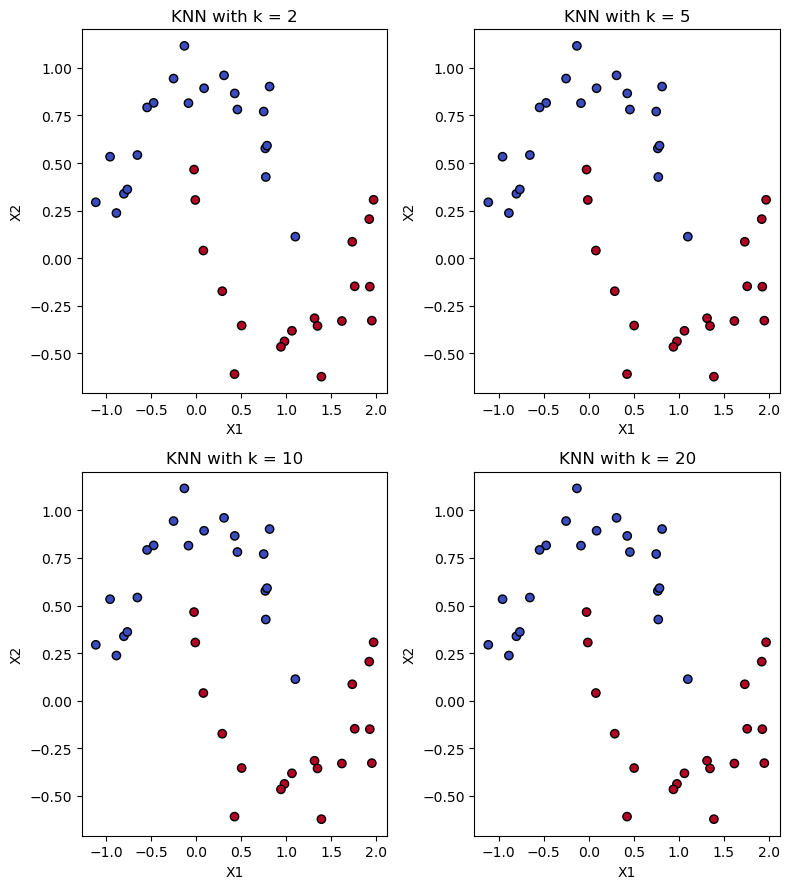

In [25]:
# code here
from sklearn.neighbors import KNeighborsClassifier

k_values = [2,5,10,20]
models = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print('KNN with k =', k)
    print('Accuracy on training set:', knn.score(X_train, y_train))
    print('Accuracy on test set:', knn.score(X_test, y_test))
    models.append(knn)
    
# Plot results for each model
fig,ax = plt.subplots(2,2,figsize=(8,9))
for idx,_ax in enumerate(ax.ravel()):
    y_pred = models[idx].predict(X_test)
    _ax.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k')
    _ax.set_title('KNN with k = {}'.format(k_values[idx]))
    _ax.set_xlabel('X1')
    _ax.set_ylabel('X2')
plt.tight_layout()
    


Response
- This method works via democratizing class assignment. Classes are assigned based on the number of neighbor votes for the k nearest neighbors in the "training" set for which class assignment is known. A simple majority wins, and ties can be dealt with by decreasing k until the tie is broken. There is no loss function, but this still counts as supervised ML since the target labels are known (and used) in model "fitting." 

## Exercise 3

This exercise will focus on multi-class classification. Use the sklearn make_blobs function to generate a toy dataset with 150 samples, 4 clusters, and a dimensionality of 10.

In [26]:
# code here
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(n_samples=150, centers=4, n_features=10)

Next, use PCA to reduce the dimensionality to 2. Plot the dataset with each point colored according to its class.

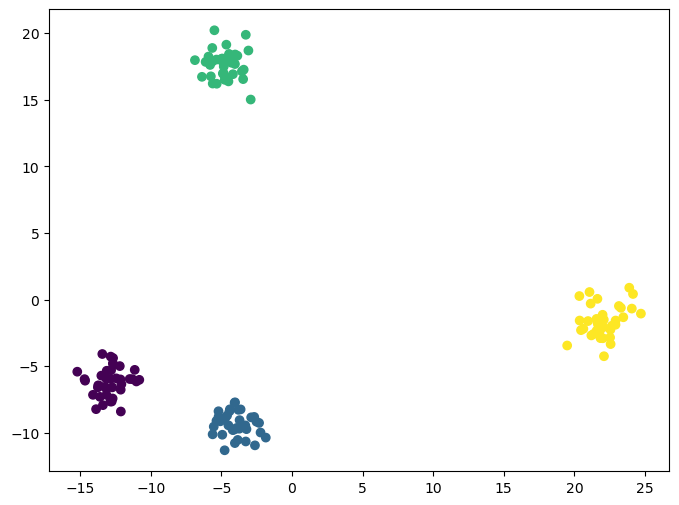

In [27]:
# code here
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2)

# fit PCA to the data
PCs = pca.fit_transform(X_blob)

# Plot first two PCs and color by class
fig,ax = plt.subplots(figsize=(8,6), dpi=100)
ax.scatter(PCs[:,0], PCs[:,1], c=y_blob, cmap='viridis')

Train a decision tree model (discriminative) model on the reduced dataset and plot the result with points colored according to their predicted class. Be sure to perform hyperparameter tuning as necessary; you can decide the extent to which this is necessary. Compute the accuracy, precision, and recall scores. 

In [32]:
# code here
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, random_state=42)

# Function that trains a decision tree classifier
def train_tree(X_train, y_train, max_depth):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    return tree
    
# Loop for training multiple trees with different max_depths
depths = [1, 2, 3, 4, 5, 6]
accuracy = 0.0
for depth in depths:
    tree = train_tree(X_train, y_train, depth)
    tmp_accuracy = tree.score(X_test, y_test)
    if tmp_accuracy > accuracy:
        accuracy = tmp_accuracy
        best_tree = tree
        best_depth = depth

# print accuracy, precision, and recall results for best tree
print("Best tree has max_depth = {}".format(best_depth))
print("Accuracy of best tree = {}".format(accuracy))
print("Precision of best tree = {}".format(precision_score(y_test, best_tree.predict(X_test), average=None)))
print("Recall of best tree = {}".format(recall_score(y_test, best_tree.predict(X_test), average=None)))

Best tree has max_depth = 3
Accuracy of best tree = 1.0
Precision of best tree = [1. 1. 1. 1.]
Recall of best tree = [1. 1. 1. 1.]


Repeat the above task with a naive Gaussian model (generative).

In [35]:
# code here
from sklearn.naive_bayes import GaussianNB

# Function that will train a Gaussian Naive Bayes classifier
def train_gnb(X_train, y_train):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    return gnb

# Train GNB and predict the response for test dataset
gnb = train_gnb(X_train, y_train)
y_pred = gnb.predict(X_test)

# Print the accuracy, precision and recall
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))


Accuracy: 1.0
Precision: [1. 1. 1. 1.]
Recall: [1. 1. 1. 1.]


## Exercise 4

This exercise focuses on unsupervised generative models, which can be used to generate new data based on patterns learned from existing data. Begin by importing the digits dataset from sklearn (also called the MNIST dataset). This is a high-dimensionality dataset consisting of hand-drawn digits (0–9) commonly used for training image processing systems. It consists of 1,797 samples, each corresponding to one of the ten digits. Each sample can be presented by an 8 x 8 grid of pixels, where each pixel is colored according to its corresponding hand-drawn image. Thus, the dimensionality is 64.

In [38]:
# Import digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
target = digits.target

Create a Gaussian mixture model (GMM) to create three new examples of the digit 6. You can use the y_mnist variable to quickly select this subset (y_mnist == 6). Show each of your predictions. Use spherical covariance and toy with the number of mixture components to create a model that can generative reasonably convincing synthetic data.

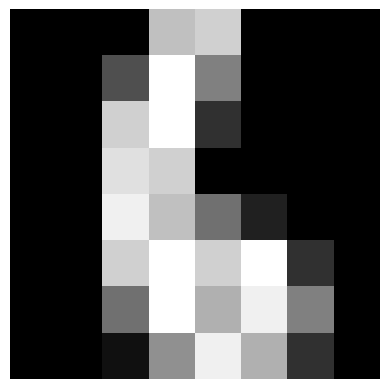

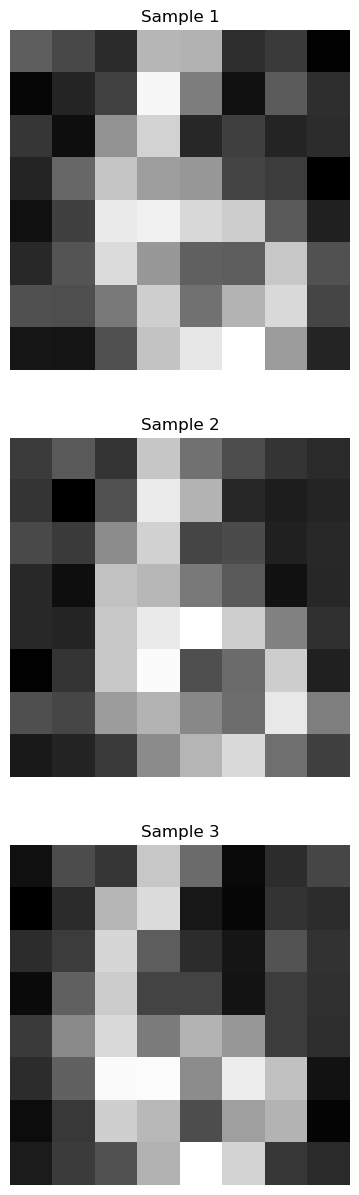

In [45]:
# Import Gaussian Mixture Model library
from sklearn.mixture import GaussianMixture

# Function to create and train a GMM with spherical covariance and variable number of mixture components
def train_GMM(X, n_components):
    gmm = GaussianMixture(n_components=n_components, covariance_type='spherical', random_state=42)
    gmm.fit(X)
    return gmm

# Function that will plot the 64 dimensional data as a 8x8 image
def plot_image(data, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(data.reshape(8,8), cmap='gray')
    ax.axis('off')
    return ax

# Confirm plot_image works by plotting a single image
plot_image(data[target == 6,:][0])

# Train a gmm with 3 components
gmm = train_GMM(data[target==6,:], 10)

# Loop to plot 3 examples of synthetic data from the GMM
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
# Generate synthetic data from the GMM
X, y = gmm.sample(3)
# Plot the synthetic data
for i in range(3):
    plot_image(X[i], ax=ax[i])
    ax[i].set_title('Sample {}'.format(i+1))




Create a kernel density estimation (KDE) model to create three new examples of the digit 6. Show each of your predictions. Use a Gaussian kernel and toy with the bandwidth to create a model that can generative reasonably convincing synthetic data. Compare the KDE model to the GMM model.

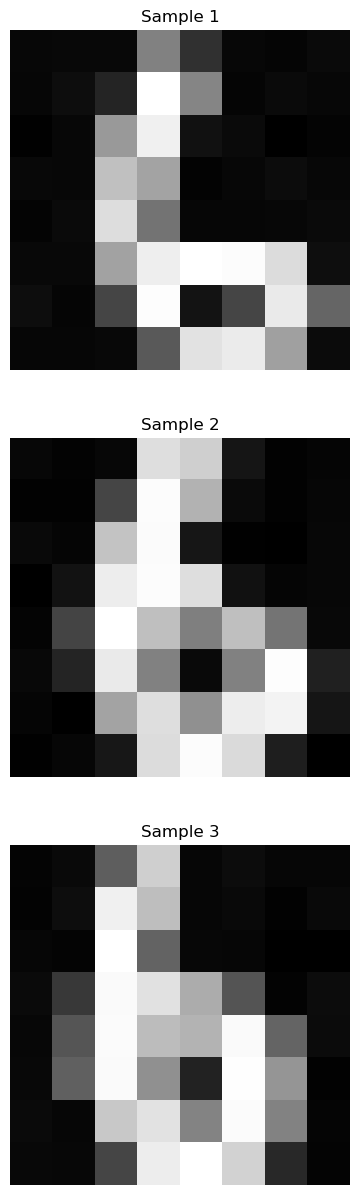

In [47]:
# Import kernel density estimation from sklearn
from sklearn.neighbors import KernelDensity

# Function to train a KDE model
def train_kde_model(data, bandwidth=0.2, kernel='gaussian'):
    kde = KernelDensity(bandwidth=bandwidth, kernel=kernel)
    kde.fit(data)
    return kde

# Train a KDE model on the training data using a Gaussian kernel and variable bandwidth
kde = train_kde_model(data[target == 6, :], bandwidth=0.2, kernel='gaussian')

# Generate 3 samples from the trained KDE model
kde_samples = kde.sample(3)
# Loop to plot 3 examples of synthetic data from the KDE
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
# Plot the synthetic data
for i in range(3):
    plot_image(kde_samples[i], ax=ax[i])
    ax[i].set_title('Sample {}'.format(i+1))

Create three synthetic examples of the digit 2 using a generative model of your choice.

In [ ]:
# code here